# FIFA22 분석

## 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 한글
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

## 데이터 불러오기

In [2]:
ff15 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_15.csv')
ff16 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_16.csv')
ff17 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_17.csv')
ff18 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_18.csv')
ff19 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_19.csv')
ff20 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_20.csv')
ff21 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_21.csv')
ff22 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_22.csv')

C:\Users\xlnt\AppData\Local\Temp\ipykernel_612\3288511680.py:1: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  ff15 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_15.csv')
C:\Users\xlnt\AppData\Local\Temp\ipykernel_612\3288511680.py:2: DtypeWarning: Columns (104) have mixed types. Specify dtype option on import or set low_memory=False.
  ff16 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_16.csv')
C:\Users\xlnt\AppData\Local\Temp\ipykernel_612\3288511680.py:4: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  ff18 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\players_18.csv')
C:\Users\xlnt\AppData\Local\Temp\ipykernel_612\3288511680.py:8: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  ff22 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\

In [3]:
dataframes = [ff15, ff16, ff17, ff18, ff19, ff20, ff21, ff22]
columns_to_drop = ['player_url','player_face_url', 'long_name','club_logo_url','club_team_id','club_jersey_number','nation_jersey_number',
                   'nation_logo_url', 'nation_flag_url', 'nation_team_id', 'nation_jersey_number', 'real_face', 'ls', 'st', 'rs',
                   'lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm', 'rcm',	'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
                   'lcb', 'cb', 'rcb', 'rb','gk', 'club_flag_url']

for df in dataframes:
    df.drop(columns=columns_to_drop, inplace=True)

In [4]:
ff15['season'] = 2015
ff16['season'] = 2016
ff17['season'] = 2017
ff18['season'] = 2018
ff19['season'] = 2019
ff20['season'] = 2020
ff21['season'] = 2021
ff22['season'] = 2022

In [5]:
# ff1522 = pd.concat([ff15,ff16,ff17,ff18,ff19,ff20,ff21,ff22])

#저장
# ff1522.to_csv(r'G:\내 드라이브\side_projects_datasets\rowdata\ff1522.csv', index=False)

In [2]:
ff1522 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\ff1522.csv')

C:\Users\xlnt\AppData\Local\Temp\ipykernel_39652\1822414639.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  ff1522 = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\ff1522.csv')


## 통계

### 리그별 오버롤 분산

In [4]:
# 4대 리그 검출

big_leagues = ff1522[ff1522['league_name'].isin(['English Premier League', 'Spain Primera Division', 'Italian Serie A', 'German 1. Bundesliga'])]

In [5]:
big_leagues.value_counts('league_name')

league_name
English Premier League    5190
Spain Primera Division    4900
Italian Serie A           4720
German 1. Bundesliga      4335
dtype: int64

In [6]:
# 리그별 선수 평균 연봉 비교

big_leagues.groupby('league_name')['wage_eur'].mean().sort_index(ascending=False)

league_name
Spain Primera Division    35334.806122
Italian Serie A           32651.578390
German 1. Bundesliga      29801.591696
English Premier League    50710.674374
Name: wage_eur, dtype: float64

In [9]:
import scipy.stats as stats

# 'big_leagues' 데이터프레임에서 'league_name'과 'wage_eur' 열만 선택하여 그룹화합니다.
grouped_data = big_leagues[['league_name', 'wage_eur']].groupby('league_name')

# 그룹별로 임금 데이터를 리스트로 저장합니다.
group_data = [group['wage_eur'].values for _, group in grouped_data]

# ANOVA 검정을 수행합니다.
anova_result = stats.f_oneway(*group_data)

# 결과 출력
print("ANOVA 검정 결과:")
print("통계량 (F-value):", anova_result.statistic)
print("p-value: {:.15f}".format(anova_result.pvalue))

ANOVA 검정 결과:
통계량 (F-value): 224.1783013570885
p-value: 0.000000000000000


In [11]:
# 해당 차이가 유의미함

In [10]:
# 리그별 오버롤 평균 비교

big_leagues.groupby('league_name')['overall'].mean().sort_index(ascending=False)

league_name
Spain Primera Division    73.016531
Italian Serie A           72.130297
German 1. Bundesliga      71.798847
English Premier League    72.485742
Name: overall, dtype: float64

In [11]:
# 'big_leagues' 데이터프레임에서 'league_name'과 'overall' 열만 선택하여 그룹화합니다.
grouped_data = big_leagues[['league_name', 'overall']].groupby('league_name')

# 그룹별로 임금 데이터를 리스트로 저장합니다.
group_data = [group['overall'].values for _, group in grouped_data]

# ANOVA 검정을 수행합니다.
anova_result = stats.f_oneway(*group_data)

# 결과 출력
print("ANOVA 검정 결과:")
print("통계량 (F-value):", anova_result.statistic)
print("p-value: {:.15f}".format(anova_result.pvalue))

ANOVA 검정 결과:
통계량 (F-value): 22.543546005886085
p-value: 0.000000000000015


In [14]:
# 해당 오버롤 차이가 유의미함

In [13]:
from scipy.stats import pearsonr

# 'overall'과 'wage_eur' 열만 선택하여 상관관계와 p-value를 계산합니다.
correlation, p_value = pearsonr(big_leagues['overall'], big_leagues['wage_eur'])

# p-value 출력
print("상관계수:", correlation)
print("p-value: {:.15f}".format(p_value))

상관계수: 0.7036303409330749
p-value: 0.000000000000000


In [14]:
# 상관관계가 유의미함

## PL 분석

| 칼럼                        | 설명                                                                         |
|-----------------------------|------------------------------------------------------------------------------|
| Season                      | 축구 시즌 연도                                                               |
| Pos                         | 해당 시즌 팀의 최종 순위                                                     |
| Team                        | 팀 이름                                                                      |
| Pld                         | 출전 경기 수                                                                 |
| W                           | 승리 수                                                                      |
| D                           | 무승부 수                                                                    |
| L                           | 패배 수                                                                      |
| GF                          | 득점 수                                                                      |
| GA                          | 실점 수                                                                      |
| GD                          | 득실차                                                                       |
| Pts                         | 해당 시즌 팀이 획득한 총 포인트                                              |
| Qualification or relegation | 팀이 유럽 대륙 컵에 진출했는지 또는 하위 리그로 강등되었는지를 나타내는 정보 |

In [7]:
# 프리미어리그 정보

epl_rank = pd.read_csv(r'G:\내 드라이브\side_projects_datasets\rawdata\fifa\EPL Standings 2000-2022.csv')
epl_rank.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


In [8]:
epl_rank['season'] = epl_rank['Season'].apply(lambda x: x.split('-')[1])

In [9]:
epl_rank['season'] = epl_rank['season'].astype(int)

In [10]:
epl_rank = epl_rank[epl_rank['season'] >= 15]

In [11]:
epl_rank.drop(columns=['Season'], inplace=True)

In [31]:
pl15_rank = epl_rank[epl_rank.season == 15].sort_values('Pos', ascending=True)
pl15_rank

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,season
280,1,Chelsea,38,26,9,3,73,32,41,87,Qualification for the Champions League group s...,15
281,2,Manchester City,38,24,7,7,83,38,45,79,Qualification for the Champions League group s...,15
282,3,Arsenal,38,22,9,7,71,36,35,75,Qualification for the Champions League group s...,15
283,4,Manchester United,38,20,10,8,62,37,25,70,Qualification for the Champions League play-of...,15
284,5,Tottenham Hotspur,38,19,7,12,58,53,5,64,Qualification for the Europa League group stag...,15
285,6,Liverpool,38,18,8,12,52,48,4,62,Qualification for the Europa League group stag...,15
286,7,Southampton,38,18,6,14,54,33,21,60,Qualification for the Europa League third qual...,15
287,8,Swansea City,38,16,8,14,46,49,-3,56,Not Applicable,15
288,9,Stoke City,38,15,9,14,48,45,3,54,Not Applicable,15
289,10,Crystal Palace,38,13,9,16,47,51,-4,48,Not Applicable,15


In [21]:
# 칼럼명 Team을 club_name으로 변경

pl15_rank.rename(columns={'Team':'club_name'}, inplace=True)

In [22]:
pl = ff1522[ff1522['league_name'] == 'English Premier League']

In [24]:
# PL overall 평균

pl_overall = pl.groupby(['season','league_name'])['overall', 'wage_eur'].mean().reset_index()
pl_overall

C:\Users\xlnt\AppData\Local\Temp\ipykernel_612\4103532859.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pl_overall = pl.groupby(['season','league_name'])['overall', 'wage_eur'].mean().reset_index()


,season,league_name,overall,wage_eur
0,2015,English Premier League,70.393939,38192.424242
1,2016,English Premier League,72.709677,47354.838710
2,2017,English Premier League,72.088146,54188.449848
3,2018,English Premier League,72.382040,57433.789954
4,2019,English Premier League,73.457576,53981.818182
5,2020,English Premier League,73.278788,51273.030303
6,2021,English Premier League,73.107034,52107.798165
7,2022,English Premier League,72.496933,50847.699387


In [26]:
# PL wage_eur 평균

pl_wage = pl.groupby(['season','league_name'])['wage_eur'].mean().reset_index()
pl_wage

,season,league_name,wage_eur
0,2015,English Premier League,38192.424242
1,2016,English Premier League,47354.838710
2,2017,English Premier League,54188.449848
3,2018,English Premier League,57433.789954
4,2019,English Premier League,53981.818182
5,2020,English Premier League,51273.030303
6,2021,English Premier League,52107.798165
7,2022,English Premier League,50847.699387


<Axes: title={'center': 'PL 연봉 추이'}, xlabel='season'>

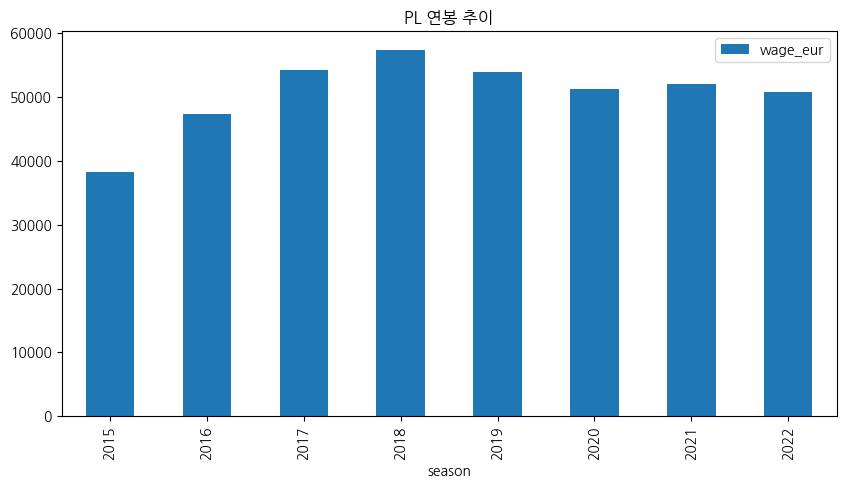

In [29]:
pl_wage.plot(x='season', y='wage_eur', kind='bar', figsize=(10,5), title='PL 연봉 추이')

In [32]:
# epl_rank에서 시즌별 1등만 추출

pl1 = epl_rank[epl_rank['Pos'] == 1]
pl1

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,season
280,1,Chelsea,38,26,9,3,73,32,41,87,Qualification for the Champions League group s...,15
300,1,Leicester City,38,23,12,3,68,36,32,81,Qualification for the Champions League group s...,16
320,1,Chelsea,38,30,3,5,85,33,52,93,Qualification for the Champions League group s...,17
340,1,Manchester City,38,32,4,2,106,27,79,100,Qualification for the Champions League group s...,18
360,1,Manchester City,38,32,2,4,95,23,72,98,Qualification for the Champions League group s...,19
380,1,Liverpool,38,32,3,3,85,33,52,99,Qualification for the Champions League group s...,20
400,1,Manchester City,38,27,5,6,83,32,51,86,Qualification for the Champions League group s...,21
420,1,Manchester City,38,29,6,3,99,26,73,93,Qualification for the Champions League group s...,22


### 가설 1 : 프리미어 리그에서는 양발일수록 연봉이 높을 것인가?

In [20]:
pl15.weak_foot.value_counts().sort_index().plot(kind='bar')

NameError: name 'pl15' is not defined

In [ ]:
pl15.pivot_table(index='weak_foot', values='wage_eur', aggfunc='mean').sort_values(by='wage_eur', ascending=False)

,wage_eur
weak_foot,
5,66555.555556
1,59666.666667
4,57495.412844
3,33907.363420
2,32940.677966


In [ ]:
# 왜 약발1이 두번째로 높을까?

pl15[pl15.weak_foot == 1].sort_values(by='wage_eur', ascending=False)

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,season
35,167948,H. Lloris,GK,85,86,21000000.0,160000.0,27,1986-12-26,188,...,25,25,25,86,81,71,81,88,64.0,2015
2360,19104,C. Hill,"CB, LB",71,71,250000.0,15000.0,35,1978-10-19,183,...,68,75,73,7,15,13,9,8,NaN,2015
10523,202886,B. Siegrist,GK,61,70,160000.0,4000.0,22,1992-01-31,194,...,25,25,25,65,63,69,61,55,36.0,2015


## 첼시 분석하기

In [12]:
chelsea = ff1522[ff1522['club_name'] == 'Chelsea']

In [13]:
result = chelsea.groupby(['season', 'short_name'])['wage_eur'].mean().reset_index().groupby('season').apply(lambda x: x.nlargest(10, 'wage_eur'))

pd.options.display.float_format = '{:.2f}'.format


display(result)

season     short_name  wage_eur
season                                     
2015   9      2015      E. Hazard 210000.00
       6      2015  Cesc Fàbregas 180000.00
       8      2015    Diego Costa 170000.00
       26     2015        P. Čech 170000.00
       29     2015    T. Courtois 170000.00
...            ...            ...       ...
2022   243    2022     M. Kovačić 135000.00
       227    2022     A. Rüdiger 130000.00
       238    2022     K. Havertz 130000.00
       228    2022    Azpilicueta 125000.00
       232    2022     C. Pulisic 120000.00

[80 rows x 3 columns]

In [15]:
# 15시즌부터 22시즌까지 첼시 순위 추출

chelsea_rank = epl_rank[epl_rank['Team'] == 'Chelsea']
chelsea_rank

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation,season
280,1,Chelsea,38,26,9,3,73,32,41,87,Qualification for the Champions League group s...,15
309,10,Chelsea,38,12,14,12,59,53,6,50,Not Applicable,16
320,1,Chelsea,38,30,3,5,85,33,52,93,Qualification for the Champions League group s...,17
344,5,Chelsea,38,21,7,10,62,38,24,70,Qualification for the Europa League group stag...,18
362,3,Chelsea,38,21,9,8,63,39,24,72,Qualification for the Champions League group s...,19
383,4,Chelsea,38,20,6,12,69,54,15,66,Qualification for the Champions League group s...,20
403,4,Chelsea,38,19,10,9,58,36,22,67,Qualification for the Champions League group s...,21
422,3,Chelsea,38,21,11,6,76,33,43,74,Qualification for the Champions League group s...,22


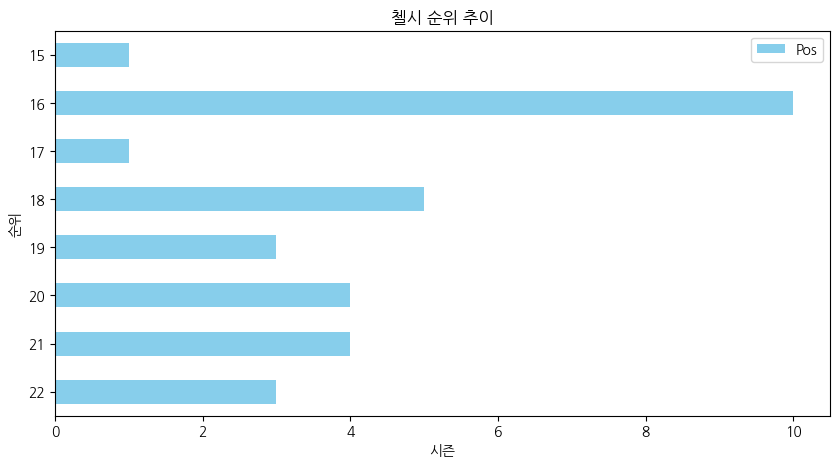

In [29]:
# 시즌별 순위 추이
ax = chelsea_rank.plot(x='season', y='Pos', kind='barh', figsize=(10,5), title='첼시 순위 추이',
xlabel='시즌', ylabel='순위',
color='skyblue')

for i, row in chelsea_rank.iterrows():
    ax.annotate(str(row['Pos']), xy=(row['Pos'], i), xytext=(row['Pos']-0.3, i-0.15),
                 textcoords='data', fontsize=10, color='black')

plt.gca().invert_yaxis()
plt.show();

In [33]:
chelsea_rank.iloc[:, 10].value_counts()

Qualification for the Champions League group stage    6
Not Applicable                                        1
Qualification for the Europa League group stage[a]    1
Name: Qualification or relegation, dtype: int64

In [40]:
chelsea_rank.groupby('season')['GF', 'GA', 'GD'].sum()

C:\Users\xlnt\AppData\Local\Temp\ipykernel_39652\3251907269.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  chelsea_rank.groupby('season')['GF', 'GA', 'GD'].sum()


,GF,GA,GD
season,,,
15,73,32,41
16,59,53,6
17,85,33,52
18,62,38,24
19,63,39,24
20,69,54,15
21,58,36,22
22,76,33,43


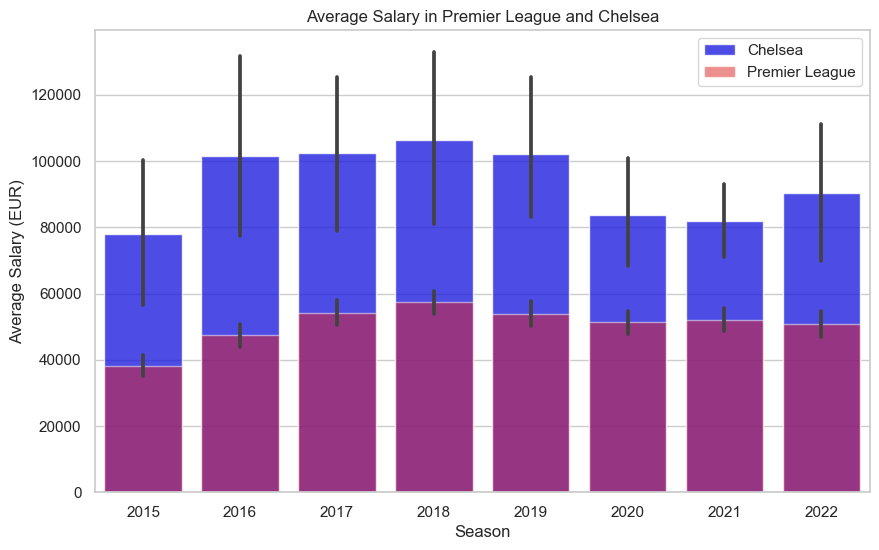

In [ ]:
# Premier League 데이터프레임에서 'English Premier League'에 해당하는 데이터만 추출
pt = ff1522[ff1522['league_name'] == 'English Premier League']

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 그래프 그리기
sns.barplot(data=chelsea, x='season', y='wage_eur', color='blue', alpha=0.8, label='Chelsea')
sns.barplot(data=pt, x='season', y='wage_eur', color='red', alpha=0.5, label='Premier League')

# 축 및 레이블 설정
plt.title('Average Salary in Premier League and Chelsea')
plt.xlabel('Season')
plt.ylabel('Average Salary (EUR)')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show();

- 첼시의 연봉이 리그 평균 연봉보다 높은 것을 알 수 있음

In [ ]:
import pandas as pd

# Pivot을 사용하여 각 연도와 팀의 평균 연봉 계산
team_average_wage = pl.pivot_table(values='wage_eur', index='club_name', columns='season', aggfunc='mean', margins=True, margins_name='Average').round(1)

display(team_average_wage)
# 각 팀의 연봉 비율 계산
# team_salary_ratio = (pl['wage_eur'] / pl.apply(lambda row: team_average_wage.loc[row['club_name'], row['season']], axis=1)) * 100

# 결과 출력
# print(team_salary_ratio)

season,2015,2016,2017,2018,2019,2020,2021,2022,Average
club_name,,,,,,,,,
AFC Bournemouth,NaN,21344.80,30000.00,38666.70,33909.10,38697.00,NaN,NaN,32801.20
Arsenal,73575.80,82500.00,95333.30,89727.30,75272.70,62515.20,63697.00,52106.10,74309.90
Aston Villa,26969.70,33766.70,NaN,NaN,NaN,29181.80,34697.00,38951.60,32615.60
Brentford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21333.30,21333.30
Brighton & Hove Albion,NaN,NaN,NaN,30727.30,30393.90,32000.00,32454.50,29545.50,31024.20
Burnley,10333.30,NaN,19636.40,32878.80,36909.10,25697.00,31000.00,22454.50,25486.80
Cardiff City,NaN,NaN,NaN,NaN,24121.20,NaN,NaN,NaN,24121.20
Chelsea,77909.10,101678.60,102393.90,106303.00,102030.30,83878.80,81787.90,90242.40,93115.80
Crystal Palace,20181.80,34689.70,45272.70,34212.10,33606.10,33363.60,35151.50,31757.60,33511.50


In [ ]:
# 전체 평균 이상의 연봉을 지급하는 구단들

filtered_average = team_average_wage.groupby('club_name')['Average'].mean().sort_values(ascending=False)
filtered_average = filtered_average[filtered_average > 50710.70]

# 결과 출력
print(filtered_average)

club_name
Manchester City     105285.30
Manchester United    95155.60
Chelsea              93115.80
Liverpool            82199.20
Arsenal              74309.90
Tottenham Hotspur    66852.50
Everton              56305.00
Name: Average, dtype: float64


In [ ]:
team_sum_wage = pl.pivot_table(values='wage_eur', index='club_name', columns='season', aggfunc='sum', margins=True, margins_name='total').round(1)

team_sum_wage.groupby('club_name')['total'].sum().sort_values(ascending=False).head(7)

club_name
total               263188400.00
Manchester City      27268900.00
Manchester United    24455000.00
Chelsea              24117000.00
Liverpool            21207400.00
Arsenal              19543500.00
Tottenham Hotspur    17448500.00
Name: total, dtype: float64

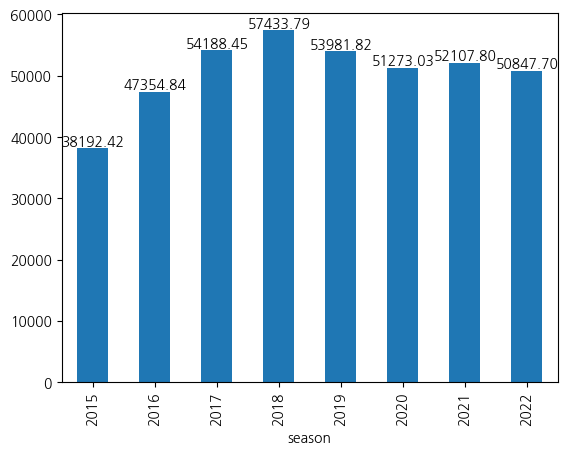

In [ ]:
# 프미리리그 평균 연봉

pt = ff1522[ff1522['league_name'] == 'English Premier League']

ax = pl.groupby('season')['wage_eur'].mean().plot(kind='bar')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
    
plt.show()

In [ ]:
chelsea.sort_values(by='overall', ascending=False)

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,season
67334,183277,E. Hazard,"LW, CF",91,91,93000000.0,325000.0,27,1991-01-07,173,...,34,27,22,11,12,6,8,8,NaN,2019
122850,215914,N. Kanté,"CDM, CM",90,90,100000000.0,230000.0,30,1991-03-29,168,...,90,93,86,15,12,10,7,10,NaN,2022
49383,183277,E. Hazard,LW,90,91,90500000.0,300000.0,26,1991-01-07,173,...,25,27,22,11,12,6,8,8,NaN,2018
49391,192119,T. Courtois,GK,89,92,59000000.0,190000.0,25,1992-05-11,199,...,11,18,16,85,91,69,86,88,49.0,2018
85434,215914,N. Kanté,"CDM, CM",89,90,66000000.0,230000.0,28,1991-03-29,168,...,90,91,85,15,12,10,7,10,NaN,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30518,213673,A. Kiwomya,"RM, CAM",55,71,180000.0,2000.0,19,1996-05-20,178,...,13,19,15,6,16,8,11,16,NaN,2016
102978,238070,J. Cumming,GK,54,74,120000.0,4000.0,19,1999-09-04,186,...,9,10,13,56,54,56,49,53,25.0,2020
14601,204231,T. Musonda,"CDM, CB",54,68,70000.0,2000.0,20,1994-01-18,185,...,53,58,56,6,12,13,14,8,NaN,2015
14668,211505,A. Davey,CB,54,65,60000.0,2000.0,19,1994-11-24,191,...,56,52,54,7,6,10,7,12,NaN,2015
